In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score
import plotly.express as px
import plotly.graph_objects as go


In [2]:
train_dataset = pd.read_csv('exoTrain.csv')
test_dataset = pd.read_csv('exoTest.csv')

In [3]:
train_dataset.head(3)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


In [4]:
test_dataset.head(3)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63


In [5]:
train_dataset.shape

(5087, 3198)

In [6]:
train_dataset.info

<bound method DataFrame.info of       LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX

In [7]:
Y = train_dataset.isna().mean()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): #Use when all the columns and row are not visible at output
  print(Y)

LABEL        0.0
FLUX.1       0.0
FLUX.2       0.0
FLUX.3       0.0
FLUX.4       0.0
FLUX.5       0.0
FLUX.6       0.0
FLUX.7       0.0
FLUX.8       0.0
FLUX.9       0.0
FLUX.10      0.0
FLUX.11      0.0
FLUX.12      0.0
FLUX.13      0.0
FLUX.14      0.0
FLUX.15      0.0
FLUX.16      0.0
FLUX.17      0.0
FLUX.18      0.0
FLUX.19      0.0
FLUX.20      0.0
FLUX.21      0.0
FLUX.22      0.0
FLUX.23      0.0
FLUX.24      0.0
FLUX.25      0.0
FLUX.26      0.0
FLUX.27      0.0
FLUX.28      0.0
FLUX.29      0.0
FLUX.30      0.0
FLUX.31      0.0
FLUX.32      0.0
FLUX.33      0.0
FLUX.34      0.0
FLUX.35      0.0
FLUX.36      0.0
FLUX.37      0.0
FLUX.38      0.0
FLUX.39      0.0
FLUX.40      0.0
FLUX.41      0.0
FLUX.42      0.0
FLUX.43      0.0
FLUX.44      0.0
FLUX.45      0.0
FLUX.46      0.0
FLUX.47      0.0
FLUX.48      0.0
FLUX.49      0.0
FLUX.50      0.0
FLUX.51      0.0
FLUX.52      0.0
FLUX.53      0.0
FLUX.54      0.0
FLUX.55      0.0
FLUX.56      0.0
FLUX.57      0.0
FLUX.58      0

In [8]:
test_dataset.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

There are too many columns to insect the missing values manually. Create a function which checks for the missing values for you.

In [9]:
count_miss_values = 0
for column in train_dataset.columns:
    for item in train_dataset[column].isnull():
        if item == True:
            count_miss_values += 1
            
count_miss_values

0

In [10]:
# First Star In The Dataset
star0 = train_dataset.iloc[0, :]
star0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

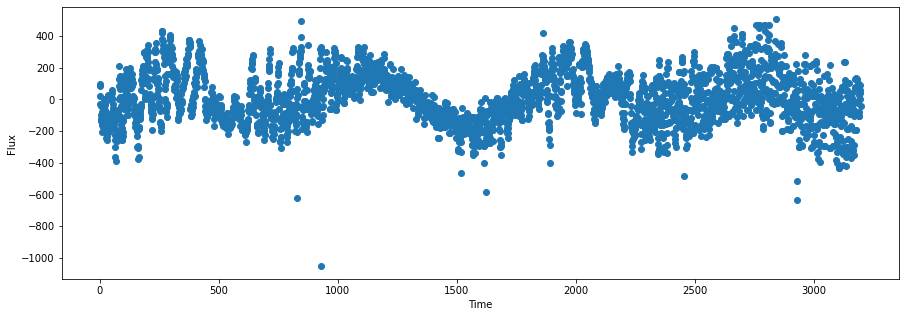

In [ ]:
# Scatter Plot For First Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star0))]), star0[1:])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()

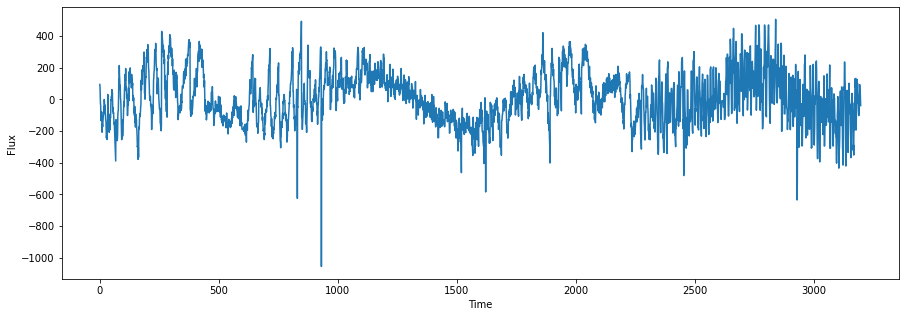

In [11]:
# Line Plot For First Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star0))]), star0[1:])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()

In [ ]:
# Last Star
star5085 = train_dataset.iloc[5085, :]
star5085.head()

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

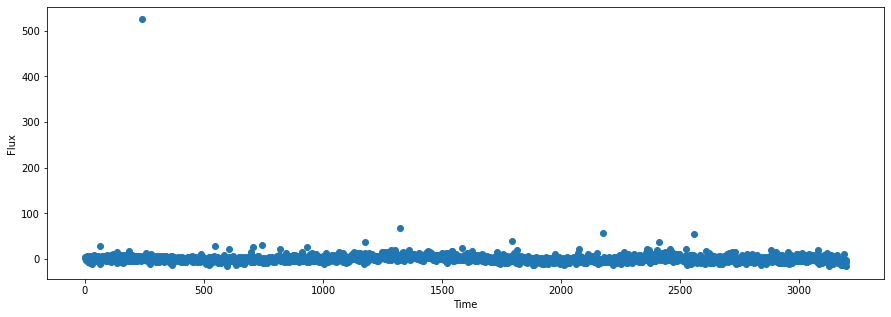

In [ ]:
# Scatter Plot For Last Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star5085))]), star5085[1:])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()

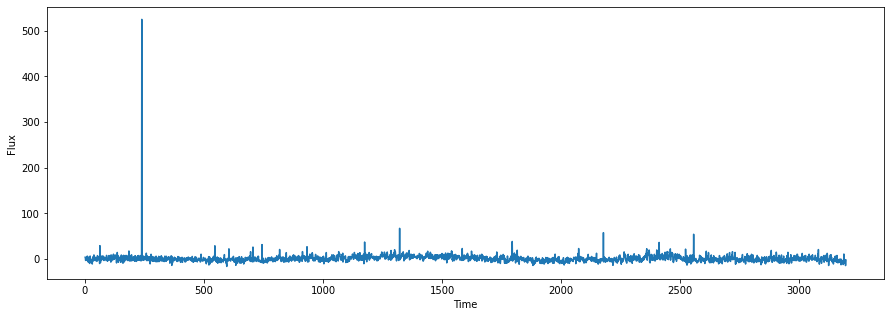

In [ ]:
# Line Plot For Last Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star5085))]), star5085[1:])
plt.ylabel('Flux')
plt.xlabel('Time')
plt.show()

# Treating outliers

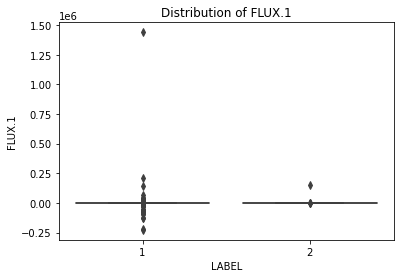

In [12]:
sns.boxplot(data=train_dataset, x='LABEL', y='FLUX.1')
plt.title('Distribution of FLUX.1')
plt.show()

The above code cell shows a very high outlier.

Since the number of outlier observed here is only 1 it will be safe to drop that data point itself.

This will result in no data loss.

In [13]:
print('Dropping Outliers')
train_dataset.drop(train_dataset[train_dataset['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


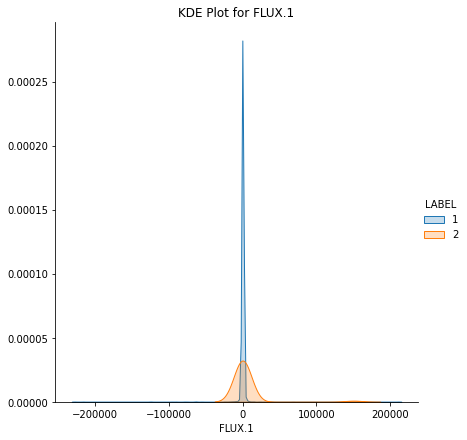

In [ ]:
sns.FacetGrid(train_dataset, hue="LABEL", height=6,).map(sns.kdeplot, "FLUX.1",shade=True).add_legend()
plt.title('KDE Plot for FLUX.1')
plt.show()

# Relation between variables

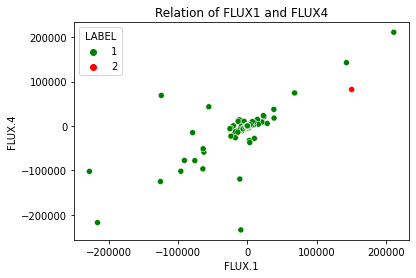

In [ ]:
sns.scatterplot(data=train_dataset, x='FLUX.1', y='FLUX.4', hue='LABEL', palette=['g','r'])
plt.title('Relation of FLUX1 and FLUX4')
plt.show()

In [ ]:
fig = px.scatter_matrix(train_dataset[['FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']])
fig.update_layout(title="Scatter Matrix for first 5 light intensities")
fig.show()

Pairplot for first 5 intensities


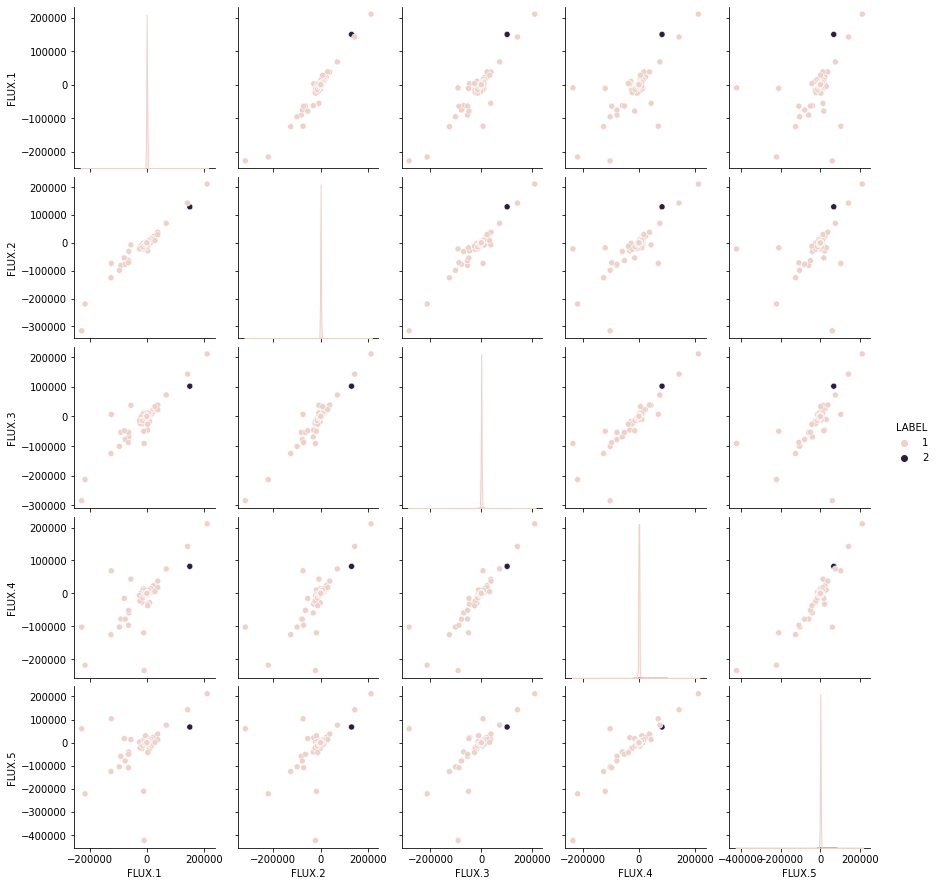

In [ ]:
print('Pairplot for first 5 intensities')
sns.pairplot(data=train_dataset[['LABEL','FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']], hue='LABEL')
plt.show()

In [14]:
train, test = train_test_split(train_dataset, test_size = 0.25)

X_train = train.drop('LABEL', axis=1)
y_train = train['LABEL']
X_test = test.drop('LABEL', axis=1)
y_test = test['LABEL']

# Logistic Regression

In [15]:
model = LogisticRegression(class_weight={1:100, 2:1})
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is', accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.6517295597484277


/home/amritesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


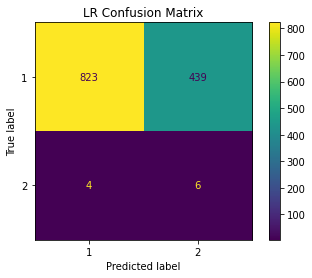

In [16]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('LR Confusion Matrix')
plt.show()

Logistic Regression is underfitting the data



# SVC

In [17]:
model = SVC(C=0.1, kernel='poly')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the SVC is', accuracy_score(prediction,y_test))

The accuracy of the SVC is 0.9913522012578616


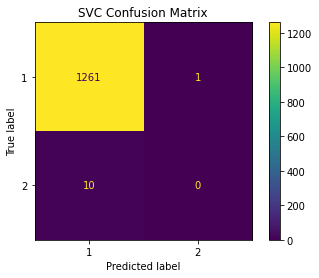

In [18]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('SVC Confusion Matrix')
plt.show()

SVC on the other hand is highly overfitting on the data.

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy is reaching 99%.

# Decision Tree

In [19]:
model = DecisionTreeClassifier(max_depth=10, random_state=16)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9803459119496856


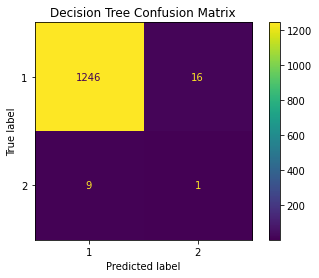

In [20]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

Decision trees seems to be providing a better result compare to logistic Regression or SVC.

Now let's check the ROC curve to see if it really worked

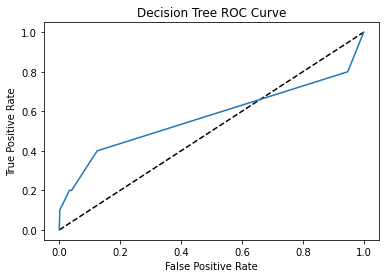

In [21]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

The above ROC curve is proving that the roc_auc score is 50% and hence the model is totally overfiting to provide high accuracy.

# Applying Synthetic Minority Oversampling Technique

In [29]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X, y)
ov_train_x,ov_train_y = model.fit_resample(train_dataset.drop('LABEL',axis=1), train_dataset['LABEL'])
ov_train_y = ov_train_y.astype('int')

Now the class imbalance problems is solved. Let's check the modelon the new dataset now.



In [39]:
X_train, X_test, y_train, y_test = train_test_split(ov_train_x, ov_train_y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,y_test)*100)
print('\nThe recall of the Decision Tree is', recall_score(prediction,y_test)*100)
print('\nThe precision of the Decision Tree is', precision_score(prediction,y_test)*100)
print('\nThe f1-score of the Decision Tree is', f1_score(prediction,y_test)*100)

The accuracy of the Decision Tree is 94.21782178217822

The recall of the Decision Tree is 98.54202401372213

The precision of the Decision Tree is 89.90610328638498

The f1-score of the Decision Tree is 94.02618657937806


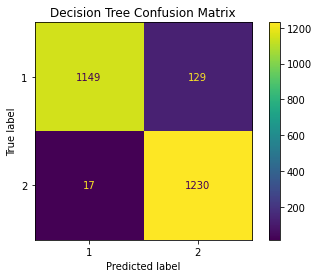

In [40]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

Now the model is performing much better and provides a much higher accuracy of 91.5%

Let's check the roc curve

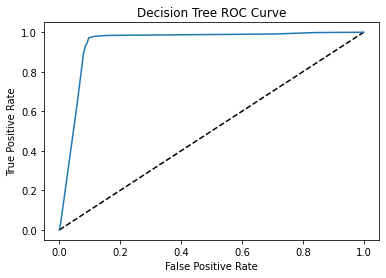

In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

The ROC curve and the roc_auc score also confirms that the model is perform much better than before.

